<a href="https://colab.research.google.com/github/SakshiJadhav7028/FUTURE_DS_03/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("Student_Satisfaction_Survey.csv", encoding="latin1")
df.head()


,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [ ]:
df.head()


,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SN                    580 non-null    int64 
 1   Total Feedback Given  580 non-null    int64 
 2   Total Configured      580 non-null    int64 
 3   Questions             580 non-null    object
 4   Weightage 1           580 non-null    int64 
 5   Weightage 2           580 non-null    int64 
 6   Weightage 3           580 non-null    int64 
 7   Weightage 4           580 non-null    int64 
 8   Weightage 5           580 non-null    int64 
 9   Average/ Percentage   580 non-null    object
 10  Course Name           580 non-null    object
 11  Basic Course          580 non-null    object
dtypes: int64(8), object(4)
memory usage: 54.5+ KB


In [ ]:
df.columns


Index(['SN', 'Total Feedback Given', 'Total Configured', 'Questions',
       'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4',
       'Weightage 5', 'Average/ Percentage', 'Course Name ', 'Basic Course'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
df.isnull().sum()


,0
SN,0
Total Feedback Given,0
Total Configured,0
Questions,0
Weightage 1,0
Weightage 2,0
Weightage 3,0
Weightage 4,0
Weightage 5,0
Average/ Percentage,0


In [ ]:
df["Average Score"] = df["Average / Percentage"].str.extract(r'(\d+\.\d+)').astype(float)


KeyError: 'Average / Percentage'

In [ ]:
print(df.columns)


Index(['SN', 'Total Feedback Given', 'Total Configured', 'Questions',
       'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4',
       'Weightage 5', 'Average/ Percentage', 'Course Name', 'Basic Course'],
      dtype='object')


In [ ]:
df["Average Score"] = (
    df["Average/ Percentage"]
    .str.extract(r'(\d+\.?\d*)')[0]
    .astype(float)
)


In [ ]:
df[["Average/ Percentage", "Average Score"]].head()


,Average/ Percentage,Average Score
0,3.00 / 60.00,3.0
1,5.00 / 100.00,5.0
2,5.00 / 100.00,5.0
3,3.00 / 60.00,3.0
4,4.00 / 80.00,4.0


In [ ]:
def get_sentiment(score):
    if score >= 4:
        return "Positive"
    elif score == 3:
        return "Neutral"
    else:
        return "Negative"


In [ ]:
df["Sentiment"] = df["Average Score"].apply(get_sentiment)


In [ ]:
df["Sentiment"].value_counts()


,count
Sentiment,
Positive,273
Negative,269
Neutral,38


In [ ]:
df[df["Sentiment"] == "Negative"][["Questions", "Average Score"]]


,Questions,Average Score
7,The teaching and mentoring process in your ins...,2.00
12,The teachers identify your strengths and encou...,2.00
17,Efforts are made by the institute/ teachers to...,2.00
41,How well did the teachers prepare for the clas...,3.82
43,The teachers approach to teaching can best be...,3.86
...,...,...
550,Your mentor does a necessary follow-up with an...,2.00
552,The teachers identify your strengths and encou...,3.50
555,The institute/ teachers use student-centric me...,3.75
559,The overall quality of the teaching-learning p...,3.75


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


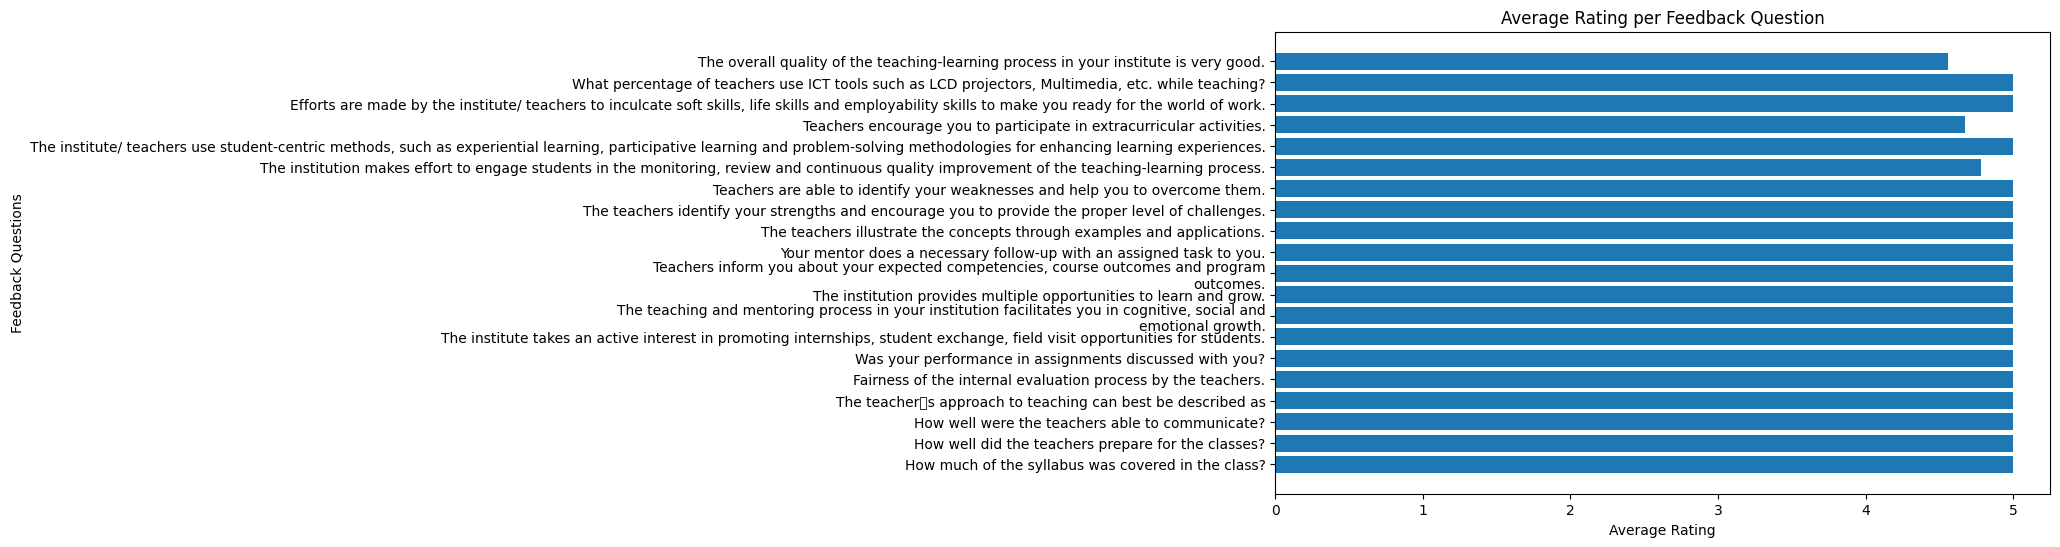

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(df["Questions"], df["Average Score"])
plt.xlabel("Average Rating")
plt.ylabel("Feedback Questions")
plt.title("Average Rating per Feedback Question")
plt.show()


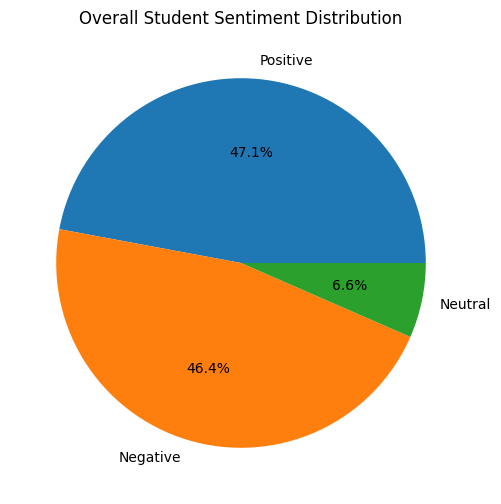

In [ ]:
df["Sentiment"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(6,6))
plt.title("Overall Student Sentiment Distribution")
plt.ylabel("")
plt.show()


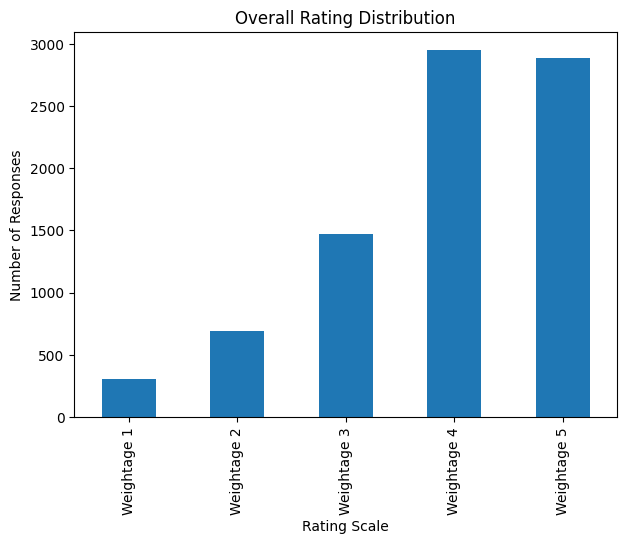

In [ ]:
rating_counts = df[[
    "Weightage 1", "Weightage 2", "Weightage 3",
    "Weightage 4", "Weightage 5"
]].sum()

rating_counts.plot(kind="bar", figsize=(7,5))
plt.xlabel("Rating Scale")
plt.ylabel("Number of Responses")
plt.title("Overall Rating Distribution")
plt.show()
